In [91]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load
mouse_file = "data/mouse_drug_data.csv"
clinicaltrial_file = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_file)
trial_df = pd.read_csv(clinicaltrial_file)

# Combine the data into a single dataset
df = pd.merge(trial_df, mouse_df, on='Mouse ID').sort_values('Timepoint')

# Display the data table for preview
df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1535,i635,0,45.0,0,Propriva
565,g791,0,45.0,0,Ramicane
1545,w746,0,45.0,0,Propriva
1547,r107,0,45.0,0,Propriva


## Tumor Response to Treatment

In [80]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
mean_tumor_volume_s = df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
mtv_df = mean_tumor_volume_s.to_frame()

# Preview DataFrame
mtv_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [81]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tv_err_s = df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
tv_err_df = tv_err_s.to_frame()

# Preview DataFrame
tv_err_df.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [82]:
# Minor Data Munging to Re-Format the Data Frames
mtv_df = mtv_df.unstack(0)['Tumor Volume (mm3)']
tv_err_df = tv_err_df.unstack(0)['Tumor Volume (mm3)']

# Preview that Reformatting worked
mtv_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [ ]:
tv_err_df

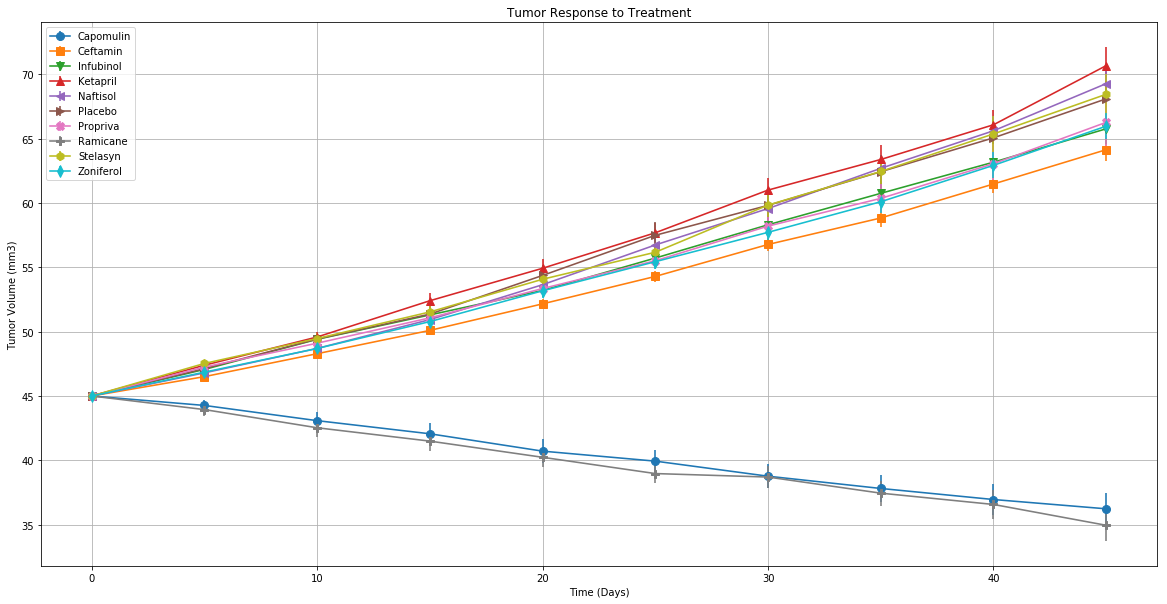

In [128]:
# Generate the Plot (with Error Bars)
# Get x axis values
x_axis = list(mtv_df.index.values)

# Get column names
drug_names = list(mtv_df)

plt.figure(figsize=(20,10))

mark = 'osv^<>XPhd'
for i,d in enumerate(drug_names):
    plt.errorbar(x_axis, mtv_df[d], yerr=tv_err_df[d], marker=mark[i] ,markersize=8, linewidth=1.6, label=d)

plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Response to Treatment')
plt.grid()
plt.legend()
tumor_volume_fig = plt.gcf()

# Save the Figure
tumor_volume_fig.savefig('tumor_response.png')

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [105]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint
mean_metastatic_sites_s = df.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean()

# Convert to DataFrame
mms_df = mean_metastatic_sites_s.to_frame()

# Preview DataFrame
mms_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [106]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
err_metastatic_sites_s = df.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem()

# Convert to DataFrame
ems_df = err_metastatic_sites_s.to_frame()

# Preview DataFrame
ems_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [110]:
# Minor Data Munging to Re-Format the Data Frames
mms_df = mms_df.unstack(0)['Metastatic Sites']
ems_df = ems_df.unstack(0)['Metastatic Sites']

# Preview that Reformatting worked
mms_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [111]:
ems_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


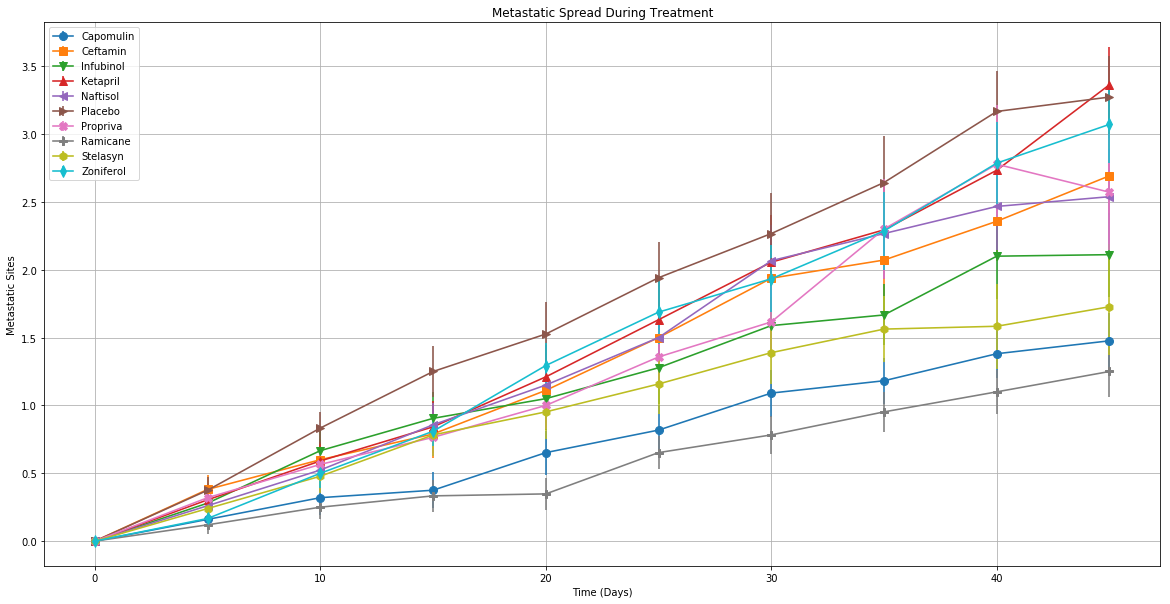

<Figure size 432x288 with 0 Axes>

In [117]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(20,10))

for i,d in enumerate(drug_names):
    plt.errorbar(x_axis, mms_df[d], yerr=ems_df[d], marker=mark[i], markersize=8, linewidth=1.6, label=d)

plt.xlabel('Time (Days)')
plt.ylabel('Metastatic Sites')
plt.title('Metastatic Spread During Treatment')
plt.grid()
plt.legend()
metastatic_fig = plt.gcf()

# Save the Figure
metastatic_fig.savefig('metastatic_spread.png')

# Show the Figure
plt.show()
plt.draw()

## Survival Rates

In [121]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
nmice_s = df.groupby(['Drug', 'Timepoint'])['Mouse ID'].nunique()

# Convert to DataFrame
nmice_df = nmice_s.to_frame()

# Preview DataFrame
nmice_df.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [124]:
# Minor Data Munging to Re-Format the Data Frames
nmice_df = nmice_df.unstack(0)['Mouse ID']

# Preview the Data Frame
nmice_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


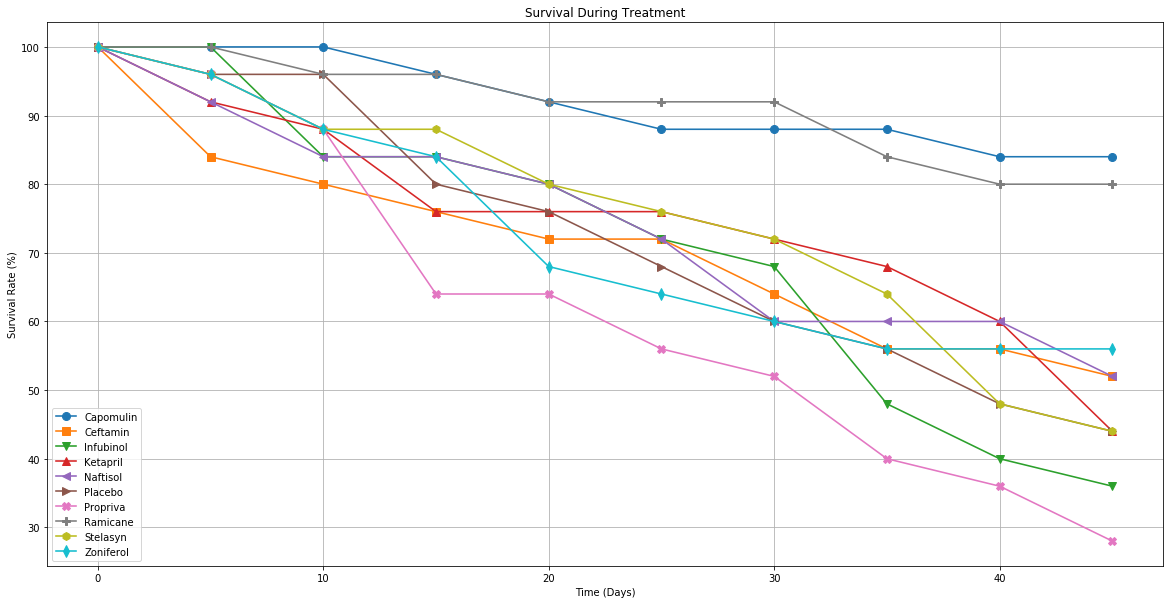

<Figure size 432x288 with 0 Axes>

In [143]:
# Generate the Plot (Accounting for percentages)
perc_mice_df = nmice_df.divide(nmice_df.ix[0]/100)

plt.figure(figsize=(20,10))

for i,d in enumerate(drug_names):
    plt.plot(x_axis, perc_mice_df[d], marker=mark[i], markersize=8, linewidth=1.6, label=d)

plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.title('Survival During Treatment')
plt.grid()
plt.legend()
survival_fig = plt.gcf()

# Save the Figure
survival_fig.savefig('survival.png')

# Show the Figure
plt.show()
plt.draw()

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

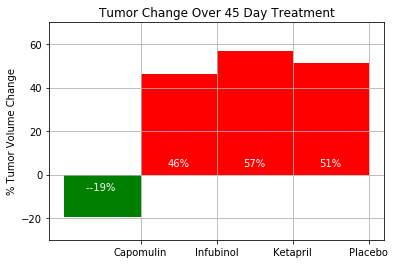